In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Reading the pickle file- df_with_items.
df_with_items = pd.read_pickle('df_with_items')

In [5]:
df_with_items.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
1,578,2013-01-02,1,103665,2.0,NaN,BREAD/BAKERY,2712,1
2,1596,2013-01-02,2,103665,5.0,NaN,BREAD/BAKERY,2712,1
3,2699,2013-01-02,3,103665,6.0,NaN,BREAD/BAKERY,2712,1
4,3900,2013-01-02,4,103665,2.0,NaN,BREAD/BAKERY,2712,1


In [6]:
df_with_items['date']= pd.to_datetime(df_with_items['date'])

## Causal Inference Exploration

Question: What time of the year and in which stores should a particular product be on-promotion?

For this, let us first find the list of products that were on promotion and how many times over the last 4-5 years.

Using the df_with_items, we filter those rows where we have the on-promotion information. Since each row is a unique 'date', 'store_nbr' and 'item_nbr' combination, therefore we find the rows where the products are on-promotion.

In [1195]:
df_onpromotion = df_with_items[df_with_items['onpromotion'] == 1]

In [1201]:
df_onpromotion = df_onpromotion.sort_values('date')

In [1202]:
df_onpromotion.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
40932043,21668391,2014-04-01,9,414354,11.0,True,GROCERY I,1014,0
26987170,21668931,2014-04-01,9,999545,2.0,True,CLEANING,3026,0
66705694,21668820,2014-04-01,9,874593,33.0,True,GROCERY I,1016,0
75416260,21669094,2014-04-01,9,1119217,2.0,True,CLEANING,3046,0
76586396,21669117,2014-04-01,9,1146795,34.0,True,GROCERY I,1040,0


In [1203]:
df_onpromotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810622 entries, 40932043 to 88838941
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  object 
 6   family       object 
 7   class        int64  
 8   perishable   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 595.9+ MB


In [1206]:
df_onpromotion.groupby(['date', 'item_nbr'])['store_nbr'].count().reset_index()

,date,item_nbr,store_nbr
0,2014-04-01,414354,1
1,2014-04-01,874593,1
2,2014-04-01,999545,1
3,2014-04-01,1057515,1
4,2014-04-01,1119217,1
...,...,...,...
688297,2017-08-15,2111870,1
688298,2017-08-15,2112404,34
688299,2017-08-15,2113914,26
688300,2017-08-15,2114812,17


In [1207]:
df_onpromotion.groupby(['date', 'item_nbr'])['store_nbr'].count().reset_index()['item_nbr'].nunique()

3939

In [1209]:
# Lets check for the 5 most occuring item_nbr by date (i.e. the item which goes on promotion the most frequently).
# For this keep only the unique 'date' and 'item_nbr' combinations
df_onpromotion.drop_duplicates(['date', 'item_nbr']).groupby('item_nbr')['date'].count().sort_values(ascending= False)

item_nbr
1167614    661
1392256    660
1392261    649
464374     630
864511     630
          ... 
1955347      1
1036317      1
1997322      1
2075374      1
99197        1
Name: date, Length: 3939, dtype: int64

In [1204]:
df_onpromotion.groupby(['date', 'item_nbr'])['store_nbr'].count().reset_index()['item_nbr'].value_counts()

1167614    661
1392256    660
1392261    649
864511     630
464374     630
          ... 
1997322      1
2026369      1
2111684      1
1459697      1
2089789      1
Name: item_nbr, Length: 3939, dtype: int64

In [1217]:
# Lets pick item number 1392256 and check whether we have enough observations to perform causal inference for this product

In [1219]:
# Checking the number of observations of onpromotion = True that we have for item number 1392256
df_with_items[(df_with_items['onpromotion'] == 1) & (df_with_items['item_nbr'] == 1392256)]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
111737400,44755685,2015-04-13,46,1392256,1.0,True,HOME AND KITCHEN II,6350,0
111737406,44851353,2015-04-15,24,1392256,2.0,True,HOME AND KITCHEN II,6350,0
111737408,44874380,2015-04-15,45,1392256,1.0,True,HOME AND KITCHEN II,6350,0
111737420,44995980,2015-04-17,45,1392256,1.0,True,HOME AND KITCHEN II,6350,0
111737423,45037317,2015-04-18,25,1392256,2.0,True,HOME AND KITCHEN II,6350,0
...,...,...,...,...,...,...,...,...,...
111744264,125357859,2017-08-14,38,1392256,3.0,True,HOME AND KITCHEN II,6350,0
111744265,125408433,2017-08-15,7,1392256,4.0,True,HOME AND KITCHEN II,6350,0
111744266,125410783,2017-08-15,8,1392256,7.0,True,HOME AND KITCHEN II,6350,0
111744268,125437770,2017-08-15,24,1392256,11.0,True,HOME AND KITCHEN II,6350,0


In [1220]:
# Checking the number of observations of onpromotion = False that we have for item number 1392256
df_with_items[(df_with_items['onpromotion'] == 0) & (df_with_items['item_nbr'] == 1392256)]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
111736700,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0
111736701,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0
111736702,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0
111736703,37868504,2014-12-21,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0
111736704,37875069,2014-12-21,27,1392256,5.0,False,HOME AND KITCHEN II,6350,0
...,...,...,...,...,...,...,...,...,...
111744263,125335253,2017-08-14,24,1392256,5.0,False,HOME AND KITCHEN II,6350,0
111744267,125435760,2017-08-15,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0
111744269,125458976,2017-08-15,37,1392256,3.0,False,HOME AND KITCHEN II,6350,0
111744271,125468559,2017-08-15,42,1392256,2.0,False,HOME AND KITCHEN II,6350,0


In [1222]:
# Checking the number of observations where we do not know whether this product was onpromotion or not
df_with_items[(df_with_items['onpromotion'].isnull()) & (df_with_items['item_nbr'] == 1392256)]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable


In [1225]:
# So there are no observations for item number 1392256 where we don't know whether the item was on promotion or not,
# which makes it a good item to pick for for causal inference model

## Exploratory Analysis for Item Number: 1392256

In [232]:
# Creating a dataframe with only those observations that contain item_nbr = 1392256

df_causal = df_with_items.loc[df_with_items['item_nbr'] == 1392256, ]

In [233]:
# df_causal.to_csv("C:\\Users\\adity\\Documents\\Winter Semester'22 Courses MMA McGill\\Enterprise Data Science\\Group Project\\df_causal.csv")

In [234]:
df_causal.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
111736700,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0
111736701,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0
111736702,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0
111736703,37868504,2014-12-21,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0
111736704,37875069,2014-12-21,27,1392256,5.0,False,HOME AND KITCHEN II,6350,0


In [235]:
df_causal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 111736700 to 111744272
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           7573 non-null   int64         
 1   date         7573 non-null   datetime64[ns]
 2   store_nbr    7573 non-null   int64         
 3   item_nbr     7573 non-null   int64         
 4   unit_sales   7573 non-null   float64       
 5   onpromotion  7573 non-null   object        
 6   family       7573 non-null   object        
 7   class        7573 non-null   int64         
 8   perishable   7573 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 591.6+ KB


In [236]:
# Checking when was the first sale recorded
df_causal['date'].min()

Timestamp('2014-12-20 00:00:00')

In [237]:
# Checking when was the last sale recorded
df_causal['date'].max()

Timestamp('2017-08-15 00:00:00')

In [238]:
# Checking the unique dates when atleast one sale was recorded
df_causal.drop_duplicates('date').shape

(964, 9)

So basically, the first time the product was sold on 20th December 2014 and since then to 8th August 2015, the product recorded a sale on 964 unique days. From 20th December 2014 to 15th August 2017, there are 969 days and out of those the product was sold on 964 days, so basically almost everyday atleast one unit of that product recorded a sale.

In [239]:
# Check which all stores is this item sold in
print("Stores in which item 1392256 is sold: ", df_causal['store_nbr'].unique())
print("Number of unique stores item 1392256 is sold in: ", df_causal['store_nbr'].nunique())

Stores in which item 1392256 is sold:  [ 1  2 23 27 24  3  8  7 37 26  5 25 38  4 41  6 46 44 45 53 51 47 50 48
 49 42]
Number of unique stores item 1392256 is sold in:  26


Thus, we now know that this item is sold in 26 out of the 54 stores. It can be possible that other stores also keep its inventory but that is highly unlikely given that we have 4 years of sales data, and it is very unlikely that a store would keep a product's inventory if it's not being sold

<AxesSubplot:ylabel='Unit Sales'>

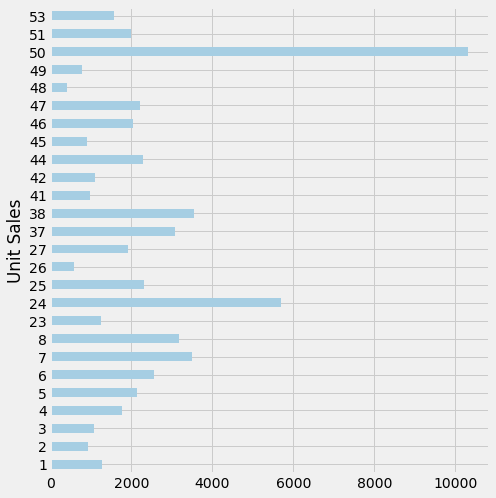

In [240]:
# Checking store wise sales of this product
df_causal.groupby('store_nbr')['unit_sales'].sum().plot(kind = 'barh', figsize = (7,8), ylabel = 'Store Number', xlabel = 'Unit Sales')

<AxesSubplot:xlabel='date'>

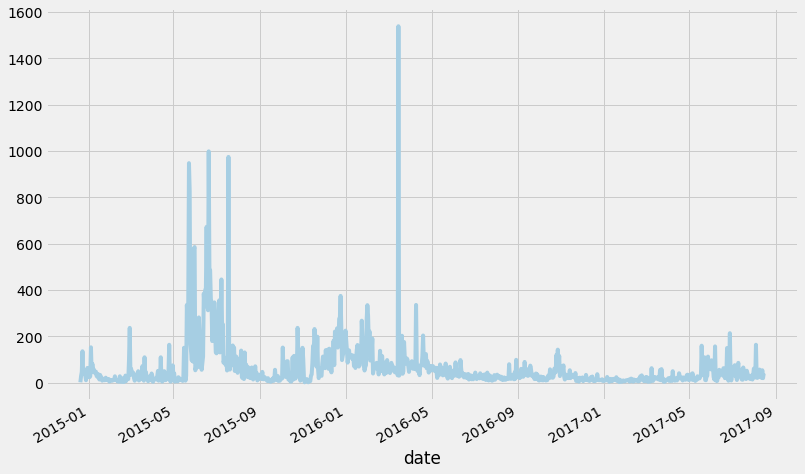

In [241]:
# Now lets check date wise what is the trend of sales

df_causal.groupby('date')['unit_sales'].sum().plot(kind = 'line', figsize = (12,8))

In [242]:
# Check month wise unit_sales trend from 2014 to 2017
trend = df_causal.groupby('date')['unit_sales'].sum().reset_index()

In [243]:
trend.index = pd.to_datetime(trend['date'], format = '%Y-%m-%d')

In [244]:
del trend['date']

In [245]:
month_wise_trend = trend.resample('M').sum()

<AxesSubplot:xlabel='Date', ylabel='Unit Sales'>

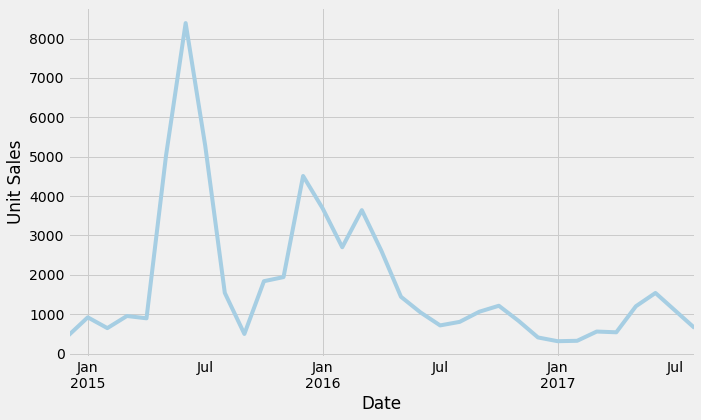

In [246]:
month_wise_trend['unit_sales'].plot(kind = 'line', figsize = (10,6), ylabel = 'Unit Sales', xlabel= 'Date')

Looks like after March 2016, the sales of this product dropped. In April 2016, there was a massive Earthquake in Equador.
It seems like after that earthquake the sales of this product never reached the values that were observed before the disaster

Lets plot bi-monthly

In [247]:
semi_month_end_trend = trend.resample('SM').sum()

<AxesSubplot:xlabel='date'>

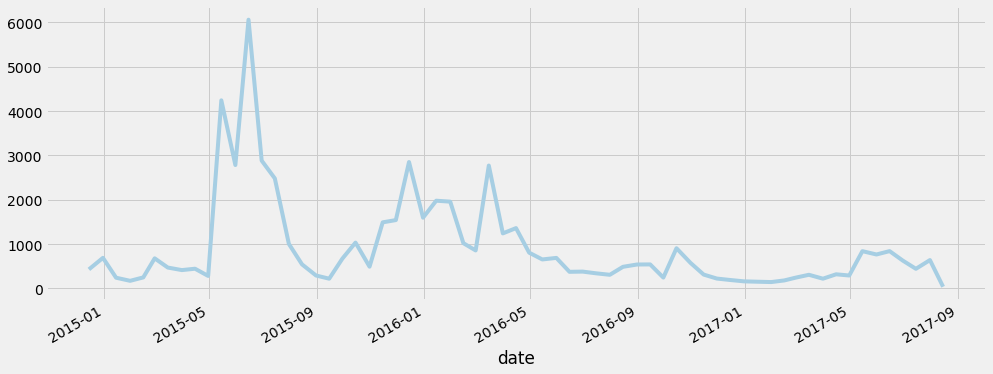

In [248]:
semi_month_end_trend['unit_sales'].plot(kind = 'line', figsize = (15,6))

In [249]:
semi_month_end_trend[28:40]

,unit_sales
date,
2016-02-15,1022.0
2016-02-29,858.0
2016-03-15,2773.0
2016-03-31,1243.0
2016-04-15,1362.0
2016-04-30,808.0
2016-05-15,655.0
2016-05-31,690.0
2016-06-15,376.0


As we can see that after April 30th, 2016, the sales for this product kept on dropping

In [250]:
# Now lets check in how many stores this product was sold and exactly on what dates
df_causal.groupby('date').agg({'store_nbr': 'count',
                              'unit_sales': 'sum'}).sort_values('store_nbr', ascending= False).rename(
    columns={'store_nbr' : 'count_of_stores', 'unit_sales': 'sum_of_unit_sales'})

,count_of_stores,sum_of_unit_sales
date,,
2015-06-08,19,90.0
2015-06-20,18,998.0
2015-06-28,18,346.0
2015-06-06,17,281.0
2015-05-28,17,175.0
...,...,...
2017-01-08,1,3.0
2015-11-08,1,1.0
2015-11-03,1,1.0


In [251]:
# Lets check whether on 2015-06-20, this product was on promotion or not
df_causal[df_causal['date'] == '2015-06-20']

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
111738070,49399204,2015-06-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0
111738071,49401212,2015-06-20,2,1392256,2.0,True,HOME AND KITCHEN II,6350,0
111738072,49403448,2015-06-20,3,1392256,11.0,True,HOME AND KITCHEN II,6350,0
111738073,49407384,2015-06-20,5,1392256,90.0,True,HOME AND KITCHEN II,6350,0
111738074,49409439,2015-06-20,6,1392256,30.0,True,HOME AND KITCHEN II,6350,0
111738075,49411341,2015-06-20,7,1392256,10.0,True,HOME AND KITCHEN II,6350,0
111738076,49413457,2015-06-20,8,1392256,3.0,True,HOME AND KITCHEN II,6350,0
111738077,49434471,2015-06-20,24,1392256,8.0,True,HOME AND KITCHEN II,6350,0
111738078,49436059,2015-06-20,25,1392256,1.0,True,HOME AND KITCHEN II,6350,0
111738079,49437354,2015-06-20,26,1392256,2.0,False,HOME AND KITCHEN II,6350,0


Analysing the above table, we can notice that on 2015-06-20, there are stores where the item is on promotion and then there are stores where the item is not on promotion

### Adding store information and holiday information to the dataframe

In [252]:
stores = pd.read_csv("C:\\Users\\adity\\Documents\\Winter Semester'22 Courses MMA McGill\\Enterprise Data Science\\Group Project\\Data Files\\stores.csv")

In [253]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [254]:
# Merging df_causal and stores
df_causal = pd.merge(df_causal, stores, on = 'store_nbr', how = 'left')

In [255]:
# df_causal.to_csv("C:\\Users\\adity\\Documents\\Winter Semester'22 Courses MMA McGill\\Enterprise Data Science\\Group Project\\df_causal_with_store.csv")

In [256]:
df_causal.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
0,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13
1,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13
2,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13
3,37868504,2014-12-21,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0,Ambato,Tungurahua,D,9
4,37875069,2014-12-21,27,1392256,5.0,False,HOME AND KITCHEN II,6350,0,Daule,Guayas,D,1


In [257]:
df_causal.shape

(7573, 13)

In [258]:
df_causal.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
family         0
class          0
perishable     0
city           0
state          0
type           0
cluster        0
dtype: int64

In [259]:
# Lets check the number of cities each store selling item number 1392256 is present in
df_causal['city'].unique()

array(['Quito', 'Ambato', 'Daule', 'Guayaquil', 'Cuenca', 'Santo Domingo',
       'Salinas', 'Loja', 'Machala', 'Manta'], dtype=object)

In [260]:
# Lets check the number of stores that are in each city
df_causal.drop_duplicates(['store_nbr', 'city']).groupby('city')['store_nbr'].count()

city
Ambato            2
Cuenca            2
Daule             1
Guayaquil         3
Loja              1
Machala           1
Manta             1
Quito            13
Salinas           1
Santo Domingo     1
Name: store_nbr, dtype: int64

Most of the stores selling item 1392256 are located in Quito

In [261]:
# Lets check the distribution of stores state wise as well
df_causal.drop_duplicates(['store_nbr', 'state']).groupby('state')['store_nbr'].count()

state
Azuay                              2
El Oro                             1
Guayas                             4
Loja                               1
Manabi                             1
Pichincha                         13
Santa Elena                        1
Santo Domingo de los Tsachilas     1
Tungurahua                         2
Name: store_nbr, dtype: int64

In [262]:
# Importing the holidays dataframe
holidays = pd.read_csv("C:\\Users\\adity\\Documents\\Winter Semester'22 Courses MMA McGill\\Enterprise Data Science\\Group Project\\Data Files\\holidays_events.csv")

In [263]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [264]:
holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [265]:
holidays['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Work Day        5
Bridge          5
Name: type, dtype: int64

In [266]:
# Categorizing 'Additional', 'Transfer' and 'Bridge' as 'Holiday' as these three are also types of holidays
holidays.loc[(holidays['type'] == 'Additional') | 
              (holidays['type'] == 'Transfer') | 
              (holidays['type'] == 'Bridge'), 'type'] = 'Holiday'

In [267]:
holidays['type'].value_counts()

Holiday     289
Event        56
Work Day      5
Name: type, dtype: int64

In [268]:
holidays = holidays.drop_duplicates('date')

In [269]:
# We only want those observations where it's either 'Holiday' or 'Event'
holidays_2 = holidays[holidays['type'].isin(['Holiday', 'Event'])]

In [270]:
holidays_2['type'].value_counts()

Holiday    259
Event       49
Name: type, dtype: int64

In [271]:
holidays_2['date'] = pd.to_datetime(holidays_2['date'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [272]:
# Merging holidays_2 with df_causal on date

df_causal = pd.merge(df_causal, holidays_2, left_on = ['date'], right_on = ['date'], how = 'left')

In [273]:
df_causal.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
1,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Navidad-4,False
2,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Navidad-4,False
3,37868504,2014-12-21,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0,Ambato,Tungurahua,D,9,Holiday,National,Ecuador,Navidad-4,False
4,37875069,2014-12-21,27,1392256,5.0,False,HOME AND KITCHEN II,6350,0,Daule,Guayas,D,1,Holiday,National,Ecuador,Navidad-4,False


In [274]:
df_causal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 7572
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           7573 non-null   int64         
 1   date         7573 non-null   datetime64[ns]
 2   store_nbr    7573 non-null   int64         
 3   item_nbr     7573 non-null   int64         
 4   unit_sales   7573 non-null   float64       
 5   onpromotion  7573 non-null   object        
 6   family       7573 non-null   object        
 7   class        7573 non-null   int64         
 8   perishable   7573 non-null   int64         
 9   city         7573 non-null   object        
 10  state        7573 non-null   object        
 11  type_x       7573 non-null   object        
 12  cluster      7573 non-null   int64         
 13  type_y       1219 non-null   object        
 14  locale       1219 non-null   object        
 15  locale_name  1219 non-null   object        
 16  descri

In [275]:
df_causal = df_causal.rename(columns = {'type_x' : 'store_type', 'type_y' : 'holiday_type'})

In [276]:
df_causal.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred
0,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
1,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Navidad-4,False
2,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Navidad-4,False
3,37868504,2014-12-21,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0,Ambato,Tungurahua,D,9,Holiday,National,Ecuador,Navidad-4,False
4,37875069,2014-12-21,27,1392256,5.0,False,HOME AND KITCHEN II,6350,0,Daule,Guayas,D,1,Holiday,National,Ecuador,Navidad-4,False


In [277]:
df_causal.isnull().sum()

id                 0
date               0
store_nbr          0
item_nbr           0
unit_sales         0
onpromotion        0
family             0
class              0
perishable         0
city               0
state              0
store_type         0
cluster            0
holiday_type    6354
locale          6354
locale_name     6354
description     6354
transferred     6354
dtype: int64

In [278]:
df_causal.loc[df_causal['holiday_type'].isnull(), 'holiday_type'] = 'No Holiday'

In [279]:
df_causal['holiday_type'].value_counts()

No Holiday    6354
Holiday        865
Event          354
Name: holiday_type, dtype: int64

In [280]:
# Dropping locale, locale_name, description and transferred columns
df_causal_2 = df_causal.drop(columns = ['locale', 'locale_name', 'description', 'transferred'])

In [281]:
df_causal_2.head(3)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,holiday_type
0,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,No Holiday
1,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday
2,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday


In [282]:
# df_causal_2.to_csv("C:\\Users\\adity\\Documents\\Winter Semester'22 Courses MMA McGill\\Enterprise Data Science\\Group Project\\Data Files\\df_causal_with_store_and_holidays.csv")

## Preparing the dataset for the Causal ML model

In [419]:
df_causal_2.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,holiday_type
0,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,No Holiday
1,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday
2,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0,Quito,Pichincha,D,13,Holiday
3,37868504,2014-12-21,23,1392256,2.0,False,HOME AND KITCHEN II,6350,0,Ambato,Tungurahua,D,9,Holiday
4,37875069,2014-12-21,27,1392256,5.0,False,HOME AND KITCHEN II,6350,0,Daule,Guayas,D,1,Holiday


In [420]:
causal = df_causal_2.join(pd.get_dummies(df_causal_2[['city', 'state', 'holiday_type']]))

In [421]:
causal.head(3)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,state_Guayas,state_Loja,state_Manabi,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,holiday_type_Event,holiday_type_Holiday,holiday_type_No Holiday
0,37761339,2014-12-20,1,1392256,1.0,False,HOME AND KITCHEN II,6350,0,Quito,...,0,0,0,1,0,0,0,0,0,1
1,37838423,2014-12-21,1,1392256,14.0,False,HOME AND KITCHEN II,6350,0,Quito,...,0,0,0,1,0,0,0,0,1,0
2,37840329,2014-12-21,2,1392256,7.0,False,HOME AND KITCHEN II,6350,0,Quito,...,0,0,0,1,0,0,0,0,1,0


In [422]:
# Dropping the following columns
# family
# perishable
# class
# state_Manabi
# holiday_type_Work Day
# city_Daule

causal = causal.drop(columns= ['family', 'perishable', 'class']) #, 'state_Manabi', 'holiday_type_Work Day', 'city_Daule'

In [423]:
causal.head(3)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,store_type,cluster,...,state_Guayas,state_Loja,state_Manabi,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,holiday_type_Event,holiday_type_Holiday,holiday_type_No Holiday
0,37761339,2014-12-20,1,1392256,1.0,False,Quito,Pichincha,D,13,...,0,0,0,1,0,0,0,0,0,1
1,37838423,2014-12-21,1,1392256,14.0,False,Quito,Pichincha,D,13,...,0,0,0,1,0,0,0,0,1,0
2,37840329,2014-12-21,2,1392256,7.0,False,Quito,Pichincha,D,13,...,0,0,0,1,0,0,0,0,1,0


In [424]:
# In the onpromotion column replacing False with 0 and True with 1

causal.loc[causal['onpromotion'] ==  False, 'onpromotion'] = 0
causal.loc[causal['onpromotion'] == True, 'onpromotion'] = 1

In [425]:
causal.head(3)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,store_type,cluster,...,state_Guayas,state_Loja,state_Manabi,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,holiday_type_Event,holiday_type_Holiday,holiday_type_No Holiday
0,37761339,2014-12-20,1,1392256,1.0,0,Quito,Pichincha,D,13,...,0,0,0,1,0,0,0,0,0,1
1,37838423,2014-12-21,1,1392256,14.0,0,Quito,Pichincha,D,13,...,0,0,0,1,0,0,0,0,1,0
2,37840329,2014-12-21,2,1392256,7.0,0,Quito,Pichincha,D,13,...,0,0,0,1,0,0,0,0,1,0


In [426]:
# Extracting year, month of the year, day of the month, day of the week
causal['year'] = pd.DatetimeIndex(causal['date']).year

In [427]:
causal['month'] = pd.DatetimeIndex(causal['date']).month

In [428]:
causal['day'] = causal['date'].dt.day

In [429]:
causal['day_of_week'] = causal['date'].dt.dayofweek

In [430]:
causal.head(2)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,store_type,cluster,...,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,holiday_type_Event,holiday_type_Holiday,holiday_type_No Holiday,year,month,day,day_of_week
0,37761339,2014-12-20,1,1392256,1.0,0,Quito,Pichincha,D,13,...,0,0,0,0,0,1,2014,12,20,5
1,37838423,2014-12-21,1,1392256,14.0,0,Quito,Pichincha,D,13,...,0,0,0,0,1,0,2014,12,21,6


In [431]:
# Also having stores as dummy variables
causal = causal.join(pd.get_dummies(causal['store_nbr'], prefix = 'store_nbr'))

In [432]:
causal = causal.join(pd.get_dummies(causal['month'], prefix = 'month'))

In [433]:
causal = causal.join(pd.get_dummies(causal['day_of_week'], prefix= 'day_of_week'))

In [434]:
causal = causal.join(pd.get_dummies(causal['day'], prefix= 'day_of_month'))

In [435]:
causal.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,store_type,cluster,...,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31
0,37761339,2014-12-20,1,1392256,1.0,0,Quito,Pichincha,D,13,...,0,0,0,0,0,0,0,0,0,0
1,37838423,2014-12-21,1,1392256,14.0,0,Quito,Pichincha,D,13,...,0,0,0,0,0,0,0,0,0,0
2,37840329,2014-12-21,2,1392256,7.0,0,Quito,Pichincha,D,13,...,0,0,0,0,0,0,0,0,0,0
3,37868504,2014-12-21,23,1392256,2.0,0,Ambato,Tungurahua,D,9,...,0,0,0,0,0,0,0,0,0,0
4,37875069,2014-12-21,27,1392256,5.0,0,Daule,Guayas,D,1,...,0,0,0,0,0,0,0,0,0,0


In [436]:
causal.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'city', 'state', 'store_type', 'cluster',
       ...
       'day_of_month_22', 'day_of_month_23', 'day_of_month_24',
       'day_of_month_25', 'day_of_month_26', 'day_of_month_27',
       'day_of_month_28', 'day_of_month_29', 'day_of_month_30',
       'day_of_month_31'],
      dtype='object', length=113)

## Creating the Causal ML model

In [438]:
# Specifying the feature variables for the model, by dropping the not required columns
X = causal.drop(columns= ['id', 
                          'date', 
                          'store_nbr', 
                          'item_nbr', 
                          'city', 
                          'state', 
                          'store_type', 
                          'cluster', 
                          'unit_sales', 
                         'onpromotion',
                         'month',
                          'day',
                         'day_of_week',
                         'holiday_type'])

In [439]:
features = X.columns

In [440]:
# Specifying the target variable, unit sales
y = causal['unit_sales']

In [441]:
# Specifying the treatment variable, onpromotion
treatment = causal['onpromotion']

In [442]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [443]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from sklearn.impute import SimpleImputer

In [445]:
# Computing the Average Treatment Effect (ATE)

xg = XGBTRegressor(random_state=42)
te, lb, ub = xg.estimate_ate(X, treatment, y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (XGBoost): 4.94 (4.22, 5.65)


In [450]:
# Computing the Individual Treatment Effect
CATE_T = xg.fit_predict(X, treatment,y)

In [451]:
# Creating a copy of the original dataframe to join the ITE values 
df_CATE = causal.copy()

In [452]:
# Joining the ITE values with the original dataframe
df_CATE['CATE'] = CATE_T

In [473]:
df_CATE.head(2)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,store_type,cluster,...,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,CATE
0,37761339,2014-12-20,1,1392256,1.0,0,Quito,Pichincha,D,13,...,0,0,0,0,0,0,0,0,0,8.350483
1,37838423,2014-12-21,1,1392256,14.0,0,Quito,Pichincha,D,13,...,0,0,0,0,0,0,0,0,0,-2.958793


In [453]:
# Computing the conditional average treatment effect by store number
df_CATE.groupby('store_nbr')['CATE'].mean().reset_index().sort_values('CATE')

,store_nbr,CATE
20,47,-6.577008
17,44,-6.256959
2,3,-0.736801
18,45,0.341359
10,25,1.052504
12,27,1.658849
11,26,2.568559
0,1,3.007307
16,42,4.110598
24,51,4.404908


On average, most of the stores depict a positive impact of promoting the product. However, stores 44, 47, 3 depict a average negative effect of promoting the product. It will be interesting to further see whether there are any particular times of the year when promoting the product in stores 44, 47, 3 is beneficial or not. 

Similarly, it will also be interesting to see the month-wise level of impact of treatment in stores that depict a positive CATE. 

It should also be kept in mind that these numbers are averages. Since our data is a combination of date, store and product, therefore, the numbers shown above need to be multiplied with the number of days on which the product was sold for each store in order to see the total impact

In [454]:
df_CATE[
    df_CATE['year'].isin([
        2015, 
        2016, 
        2017])].groupby('month')['CATE'].mean().sort_values()

month
5    -1.826956
7    -1.125002
3     2.496312
8     4.611649
9     4.688862
4     4.789125
2     5.844730
11    6.544708
1     8.475657
12    8.583176
10    9.715104
6     9.883513
Name: CATE, dtype: float64

From the above results, we see that July and May are the months where on average the promotions have a negative effect. 

Again, it would be interesting the see how the effect of treatment changes for months across different stores. 

#### Now analysing CATE by year and month in order to see any particular trend in sales due to promotions during certain months across all three years

In [455]:
df_year_month = df_CATE.groupby(['year', 'month'])['CATE'].mean().reset_index()

In [456]:
df_year_month[df_year_month['year'] == 2015].sort_values('CATE', ascending= False)

,year,month,CATE
10,2015,10,13.863125
6,2015,6,12.827446
12,2015,12,9.861663
1,2015,1,7.679017
11,2015,11,7.181732
9,2015,9,4.323034
8,2015,8,3.403919
2,2015,2,2.633069
3,2015,3,0.616135
4,2015,4,-0.152146


In [457]:
df_year_month[df_year_month['year'] == 2016].sort_values('CATE', ascending= False)

,year,month,CATE
13,2016,1,8.798266
14,2016,2,7.319979
22,2016,10,7.041936
16,2016,4,6.749926
23,2016,11,5.904692
24,2016,12,5.435384
20,2016,8,4.981905
21,2016,9,4.948382
17,2016,5,4.569167
18,2016,6,3.980092


In [458]:
df_year_month[df_year_month['year'] == 2017].sort_values('CATE', ascending= False)

,year,month,CATE
30,2017,6,12.099403
25,2017,1,8.947117
29,2017,5,8.071168
32,2017,8,7.556511
27,2017,3,5.926939
28,2017,4,5.278464
31,2017,7,5.118084
26,2017,2,5.085875


From the above three tables we see that months- October, November, December, January and June are those where the effect of treatment is the most prominent. In 2016, we do see that promotions did not do well during June but that was also the year when Ecuador experienced a devastating earthquake in April, which definitely had an effect on this product's sales as we saw during the exploratory analysis of this product.

However, even with an earthquake happening in 2016, months of Oct, Nov and Dec perform better than other months in terms of promotions.

It should also be noted that 2017 of the three years shows a much balanced performance of promotions across the first 8 months, with the CATE being more than 4 for all the first 8 months.

Also, observing that across all three years, the effect of treatment is the most prominent for October, November, December, January and June, is a testament in itself that during these months promotions definitely perform better than during other months

#### Now lets analyse the effect of treatment by store number and month, in order to see the how the treatment effect differs for each store during different months

In [459]:
df_store_month = df_CATE[df_CATE['year'].isin([2015,2016,2017])].groupby(['store_nbr', 'month'])['CATE'].mean().reset_index()

In [460]:
df_store_month.head()

,store_nbr,month,CATE
0,1,1,3.297041
1,1,2,2.906875
2,1,3,3.977947
3,1,4,7.057582
4,1,5,3.016990


In [461]:
df_store_month_pivot = pd.pivot_table(df_store_month, values = 'CATE', index = 'store_nbr', columns = 'month').reset_index()

In [462]:
df_store_month_pivot = df_store_month_pivot.fillna(0)

In [463]:
df_store_month_pivot.head()

month,store_nbr,1,2,3,4,5,6,7,8,9,10,11,12
0,1,3.297041,2.906875,3.977947,7.057582,3.016990,-4.135725,3.111984,2.763010,2.125891,0.000000,18.939722,7.005189
1,2,6.491313,4.492647,0.000000,8.516034,3.192442,1.885547,1.979904,4.183256,3.030081,9.235936,5.676550,4.197946
2,3,2.695686,2.605520,1.759614,3.271056,-31.781964,-1.941215,0.996293,4.302057,0.868669,2.410839,3.356589,3.116918
3,4,8.833275,6.826613,8.556843,9.560652,3.302940,3.439372,3.048128,5.907428,5.592702,4.477650,12.655932,13.530077
4,5,11.739612,1.904115,6.354261,4.135530,-36.845330,15.742639,-2.435603,24.107500,13.651695,5.453686,24.778827,15.690319


In [464]:
df_store_month_pivot.shape

(26, 13)

#### Plotting feature importance

In [465]:
# Plotting the feature importance graph with method = 'auto'
feature_importance = pd.DataFrame(xg.get_importance(X=X, tau= CATE_T, normalize=True, method='permutation', features = features))

In [466]:
feature_importance.columns

Int64Index([1], dtype='int64')

In [467]:
feature_importance = feature_importance.sort_values([1])

<AxesSubplot:>

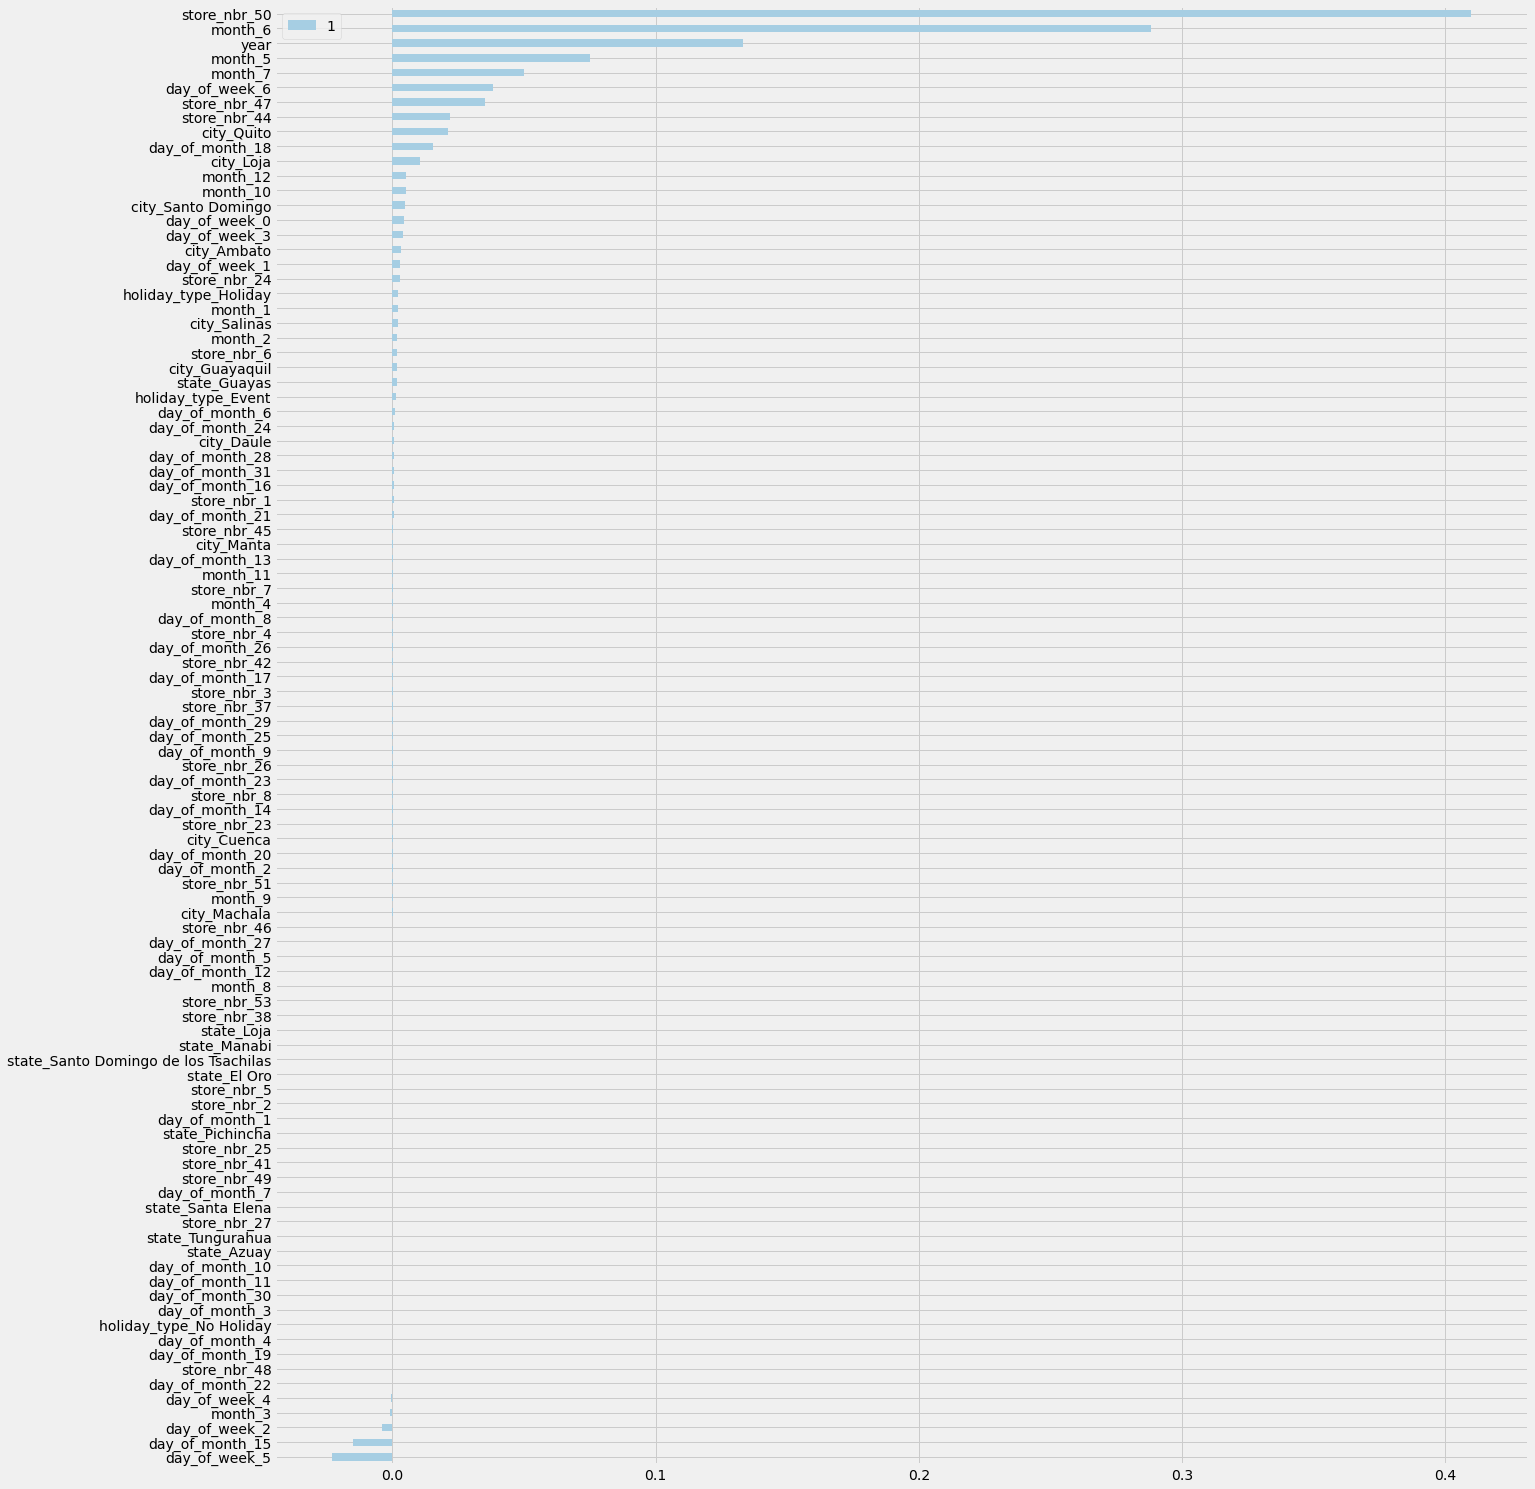

In [472]:
feature_importance.plot(kind = 'barh', figsize = (20,25))

In [469]:
shap_values = xg.get_shap_values(X=X, tau= CATE_T, features = features)

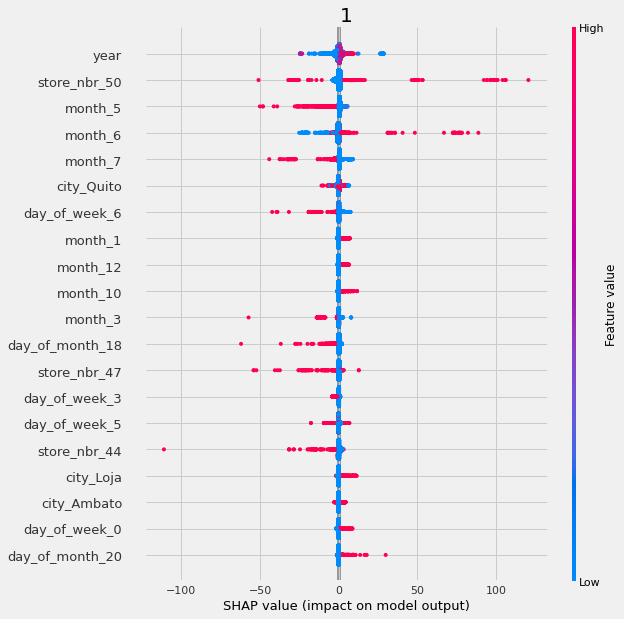

In [470]:
xg.plot_shap_values(X=X, shap_dict=shap_values, features = features)